In [1]:
%load_ext autoreload
%autoreload 2

# SparseEdges : computing sparseness of natural images with retina-like RFs

Let's compute the "edges" produced with symmetrical filters.

## Initialization

defining framework


In [2]:
from __future__ import division, print_function
pltimport numpy as np
np.set_printoptions(precision=2, suppress=True)

cluster = False

experiment = 'retina-sparseness'
name_database = 'serre07_distractors'
#parameter_file = '/Users/laurentperrinet/pool/science/BICV/SparseEdges/default_param.py'
parameter_file = 'https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py'
#lena_file = '/Users/laurentperrinet/pool/science/BICV/SparseEdges//database/lena256.png'
lena_file = 'https://raw.githubusercontent.com/bicv/SparseEdges/master/database/lena256.png'
lena_file = '../../BICV/SparseEdges/database/lena256.png'
N_image = 100
N = 2**11
B_theta = np.inf
do_linear = False

In [3]:
from SparseEdges import SparseEdges
mp = SparseEdges(parameter_file)
mp.pe.N_X, mp.pe.N_Y = 64, 64
mp.pe.figpath, mp.pe.formats, mp.pe.dpi = 'figures', ['png', 'pdf', 'jpg'], 450
mp.init()
print ('Range of spatial frequencies: ', mp.sf_0)

Range of spatial frequencies:  [ 0.62  0.38  0.24  0.15  0.09  0.06  0.03  0.02]


In [4]:
mp.pe

{'B_sf': 0.4,
 'B_theta': 0.17453277777777776,
 'C_range_begin': -5,
 'C_range_end': 10.0,
 'MP_alpha': 0.7,
 'MP_do_mask': True,
 'MP_rho': None,
 'N': 2048,
 'N_Dtheta': 24,
 'N_X': 64,
 'N_Y': 64,
 'N_image': None,
 'N_phi': 12,
 'N_r': 6,
 'N_scale': 5,
 'N_svm_cv': 50,
 'N_svm_grid': 32,
 'base_levels': 1.618,
 'd_max': 2.0,
 'd_min': 0.5,
 'd_width': 45.0,
 'datapath': 'database',
 'dip_B_psi': 0.1,
 'dip_B_theta': 1.0,
 'dip_epsilon': 0.5,
 'dip_scale': 1.5,
 'dip_w': 0.2,
 'do_edgedir': False,
 'do_mask': True,
 'do_rank': False,
 'do_whitening': True,
 'dpi': 450,
 'edge_mask': True,
 'edge_scale_chevrons': 180.0,
 'edgefigpath': 'results/edges',
 'edgematpath': 'data_cache/edges',
 'eta_SO': 0.0,
 'figpath': 'figures',
 'figsize': 14.0,
 'figsize_cohist': 8,
 'figsize_hist': 8,
 'formats': ['png', 'pdf', 'jpg'],
 'gamma_range_begin': -14,
 'gamma_range_end': 3,
 'kappa_phase': 0.0,
 'line_width': 1.0,
 'line_width_chevrons': 0.75,
 'loglevel_max': 7,
 'mask_exponent': 3.0,
 '

In [2]:
import matplotlib
pylab_defaults = { 
    'font.size': 10,
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'text.usetex': False,
    'font.family' : 'sans-serif',
    'font.sans-serif' : ['Helvetica'],
    }
matplotlib.rcParams.update(pylab_defaults)

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
fig_width_pt = 397.48  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
#fig_width = 21
figsize=(fig_width, .618*fig_width)
#figpath, ext = os.path.join(os.getenv('HOME'), 'pool/science/RetinaClouds/2016-05-20_nips'), '.pdf'

Standard edges are oriented, but one may modify that:

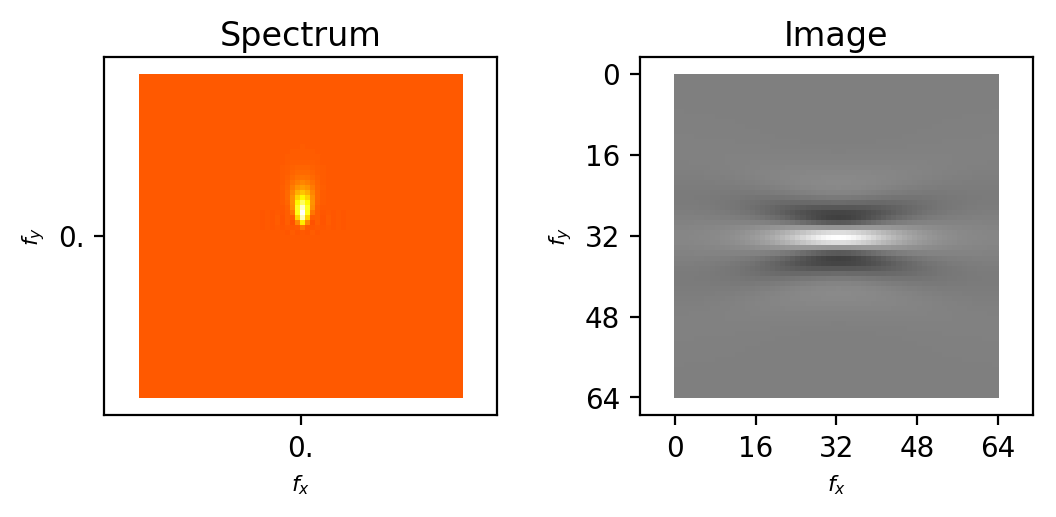

In [6]:
sf_0 = .09 # TODO .1 cycle / pixel (Geisler)
params= {'sf_0':sf_0, 'B_sf': mp.pe.B_sf, 'theta':np.pi, 'B_theta': mp.pe.B_theta}
FT_lg = mp.loggabor(mp.pe.N_X/2, mp.pe.N_Y/2, **params)
#(fourier_domain(mp.normalize(np.absolute(FT_lg), center=False))+ image_domain(mp.normalize(mp.invert(FT_lg), center=False)))
fig, a1, a2 = mp.show_FT(FT_lg, axis=True, figsize=(fig_width, fig_width/2))
fig.tight_layout()
mp.savefig(fig, experiment + '_loggabor')

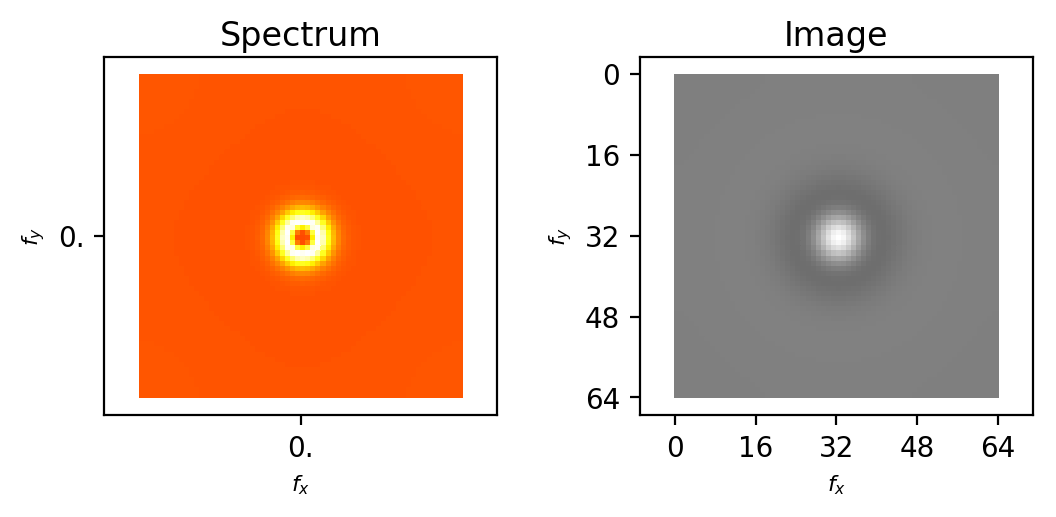

In [7]:
sf_0 = .06 # TODO .1 cycle / pixel (Geisler)
params= {'sf_0':sf_0, 'B_sf': mp.pe.B_sf, 'theta':0., 'B_theta': np.inf}
FT_lg = mp.loggabor(mp.pe.N_X/2, mp.pe.N_Y/2, **params)
fig, a1, a2 = mp.show_FT(FT_lg, axis=True, figsize=(fig_width, fig_width/2))
fig.tight_layout()
mp.savefig(fig, experiment + '_dog')

When defining the framework, one thus needs only one angle:

In [8]:
print ('Range of angles (in degrees): ', mp.theta*180./np.pi)
mp.pe.n_theta = 1
mp.pe.B_theta = np.inf
mp.init()
print ('Range of angles (in degrees): ', mp.theta*180./np.pi)

Range of angles (in degrees):  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
Range of angles (in degrees):  [ 90.]


In [9]:
print('Final sparseness in the representation = {}'.format(mp.pe.N/mp.oc))
print('Final sparseness in the pyramid = {}'.format(mp.pe.N/(4/3*mp.pe.N_X*mp.pe.N_Y)))

Final sparseness in the representation = 0.0625
Final sparseness in the pyramid = 0.375


## one example image

-0.950759120364 0.891900615494


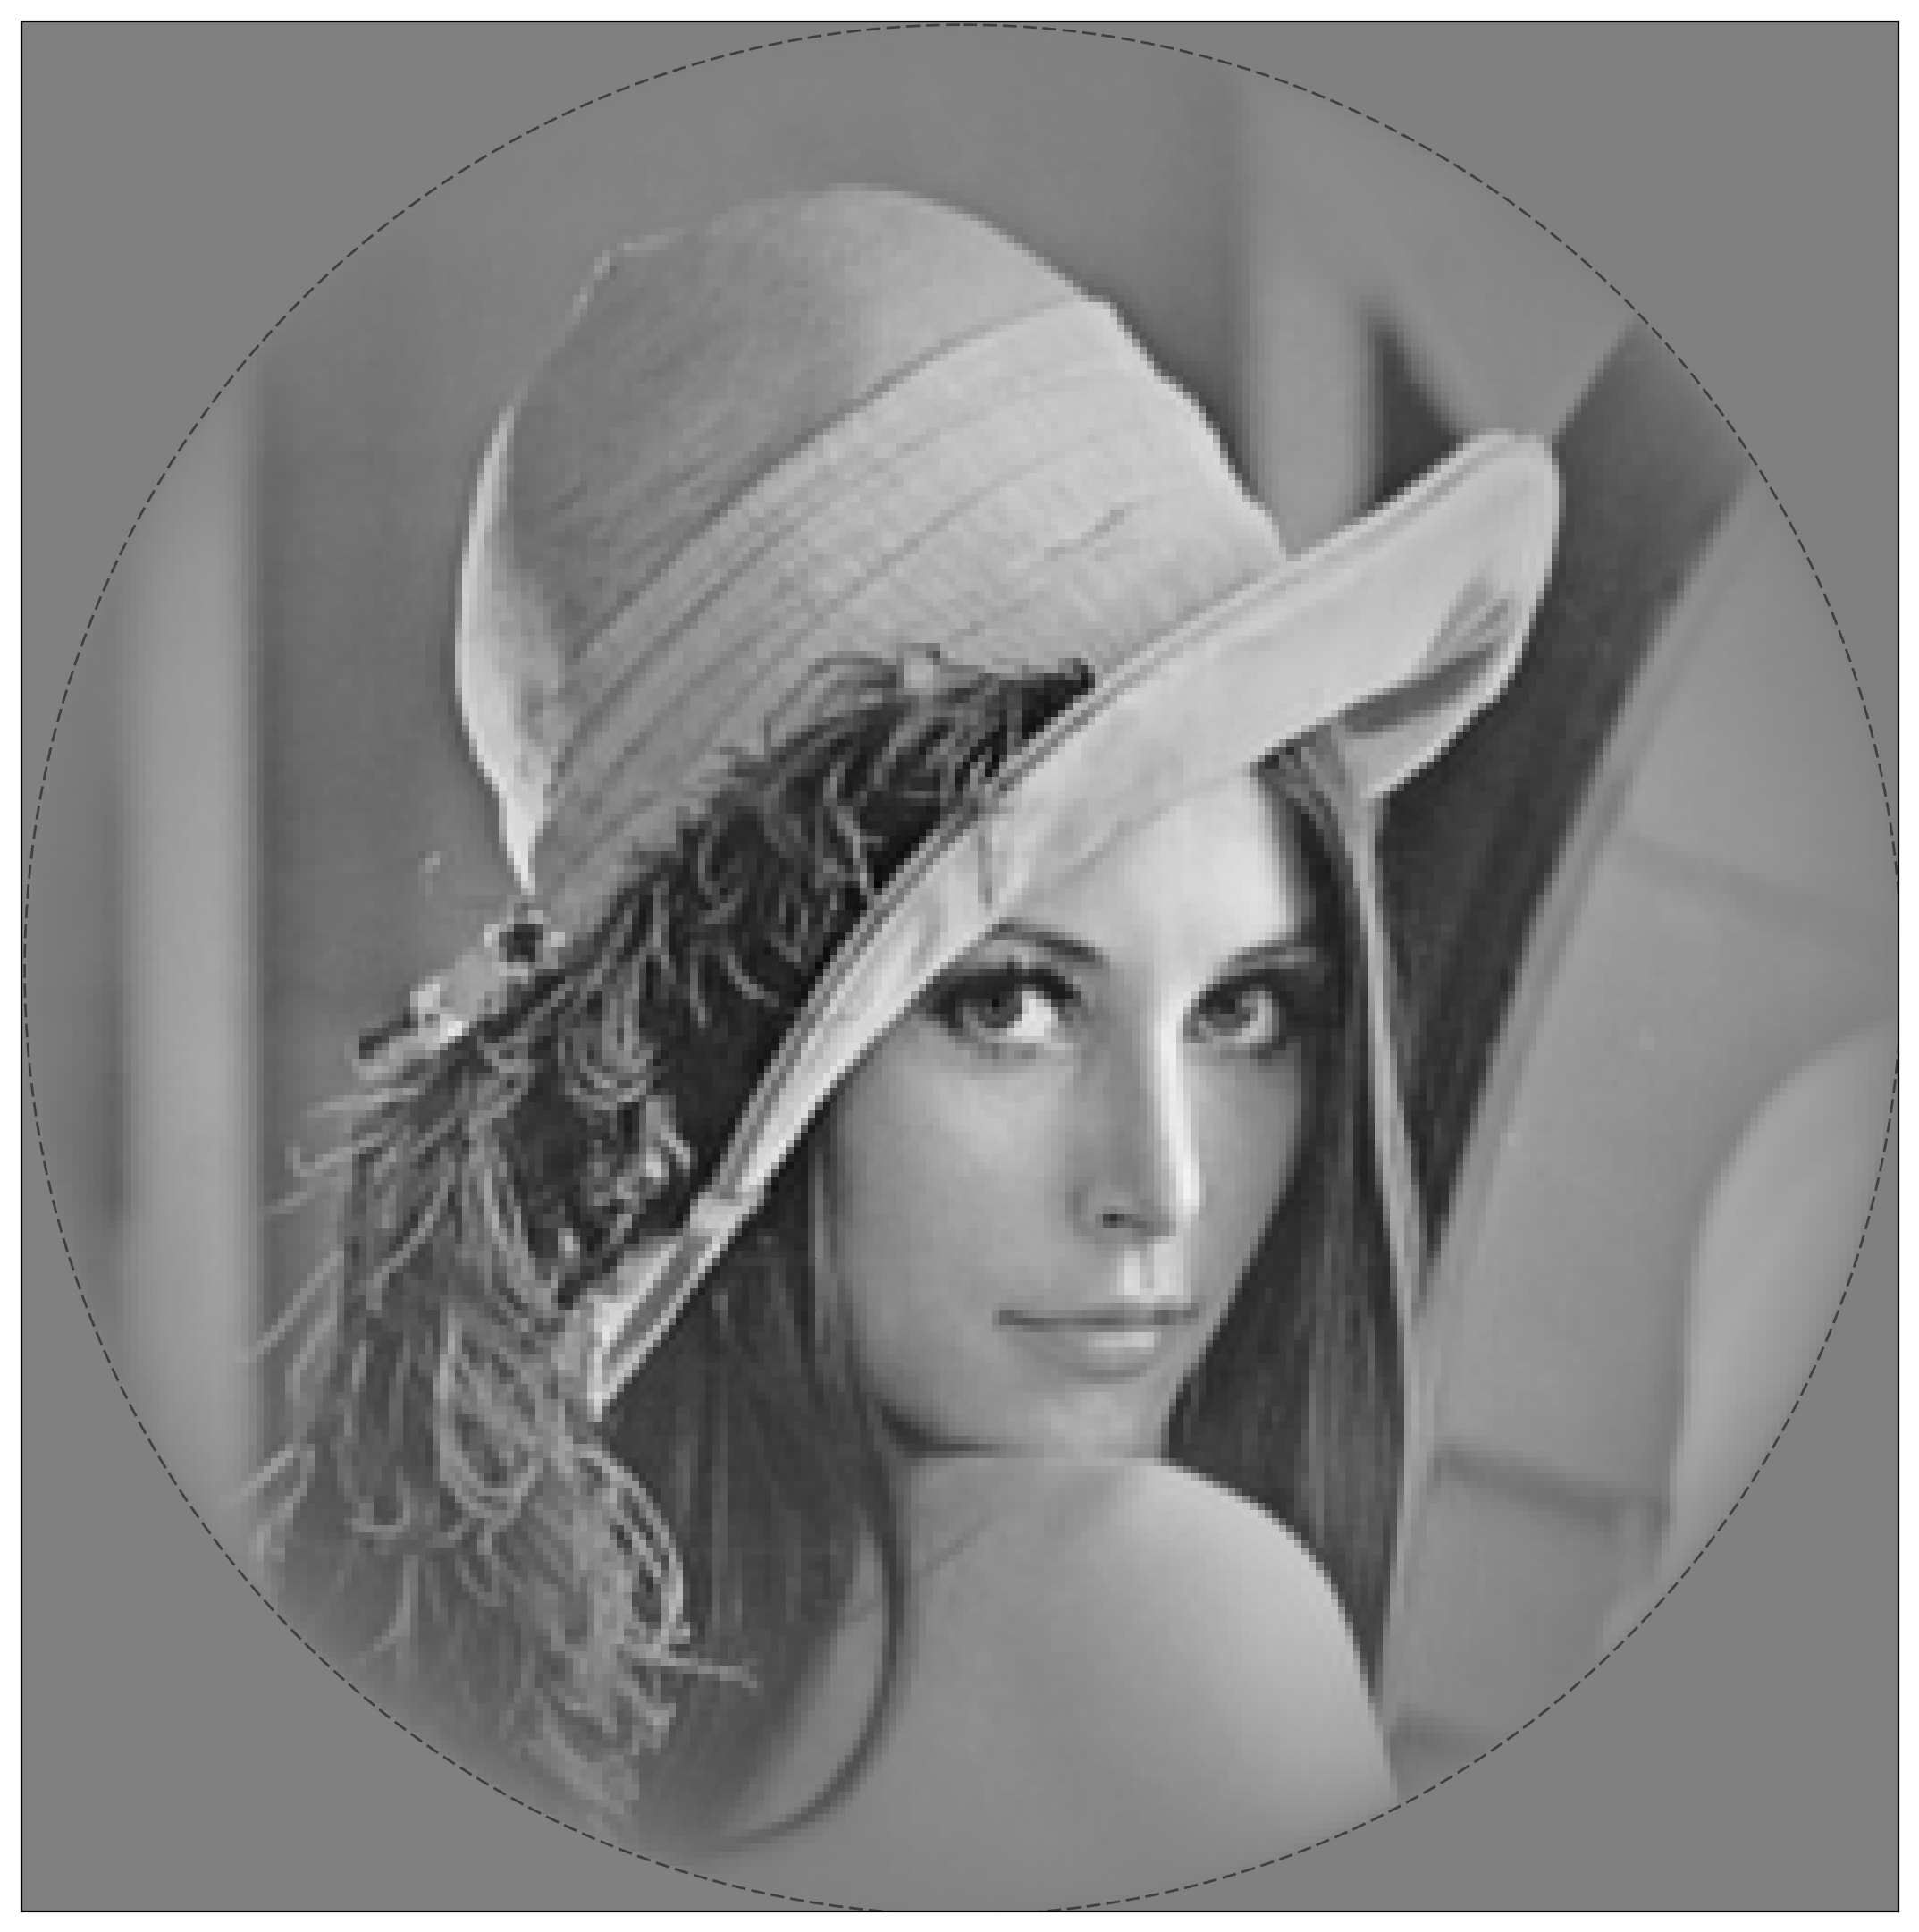

In [10]:
mp = SparseEdges(parameter_file)
mp.pe.figpath, mp.pe.formats, mp.pe.dpi = 'figures', ['png', 'pdf', 'jpg'], 450

image = mp.imread(lena_file)
mp.pe.N = N
mp.pe.do_mask = True
mp.pe.n_theta = 1
mp.pe.B_theta = B_theta
mp.pe.line_width = 0
mp.pe.mask_exponent = 4.
mp.init()
image = mp.normalize(image, center=False)
image *= mp.mask
print(image.min(), image.max())
fig, ax = mp.imshow(image, mask=True, norm=False)


In [11]:

name = experiment.replace('sparseness', 'lena')
matname = os.path.join(mp.pe.matpath, name + '.npy')
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=False)
    np.save(matname, edges)    

    
matname = os.path.join(mp.pe.matpath, name + '_rec.npy')
try:
    image_rec = np.load(matname)
except:
    image_rec = mp.reconstruct(edges, mask=True)        
    np.save(matname, image_rec)    
    

In [12]:
print(matname)

data_cache/retina-lena_rec.npy


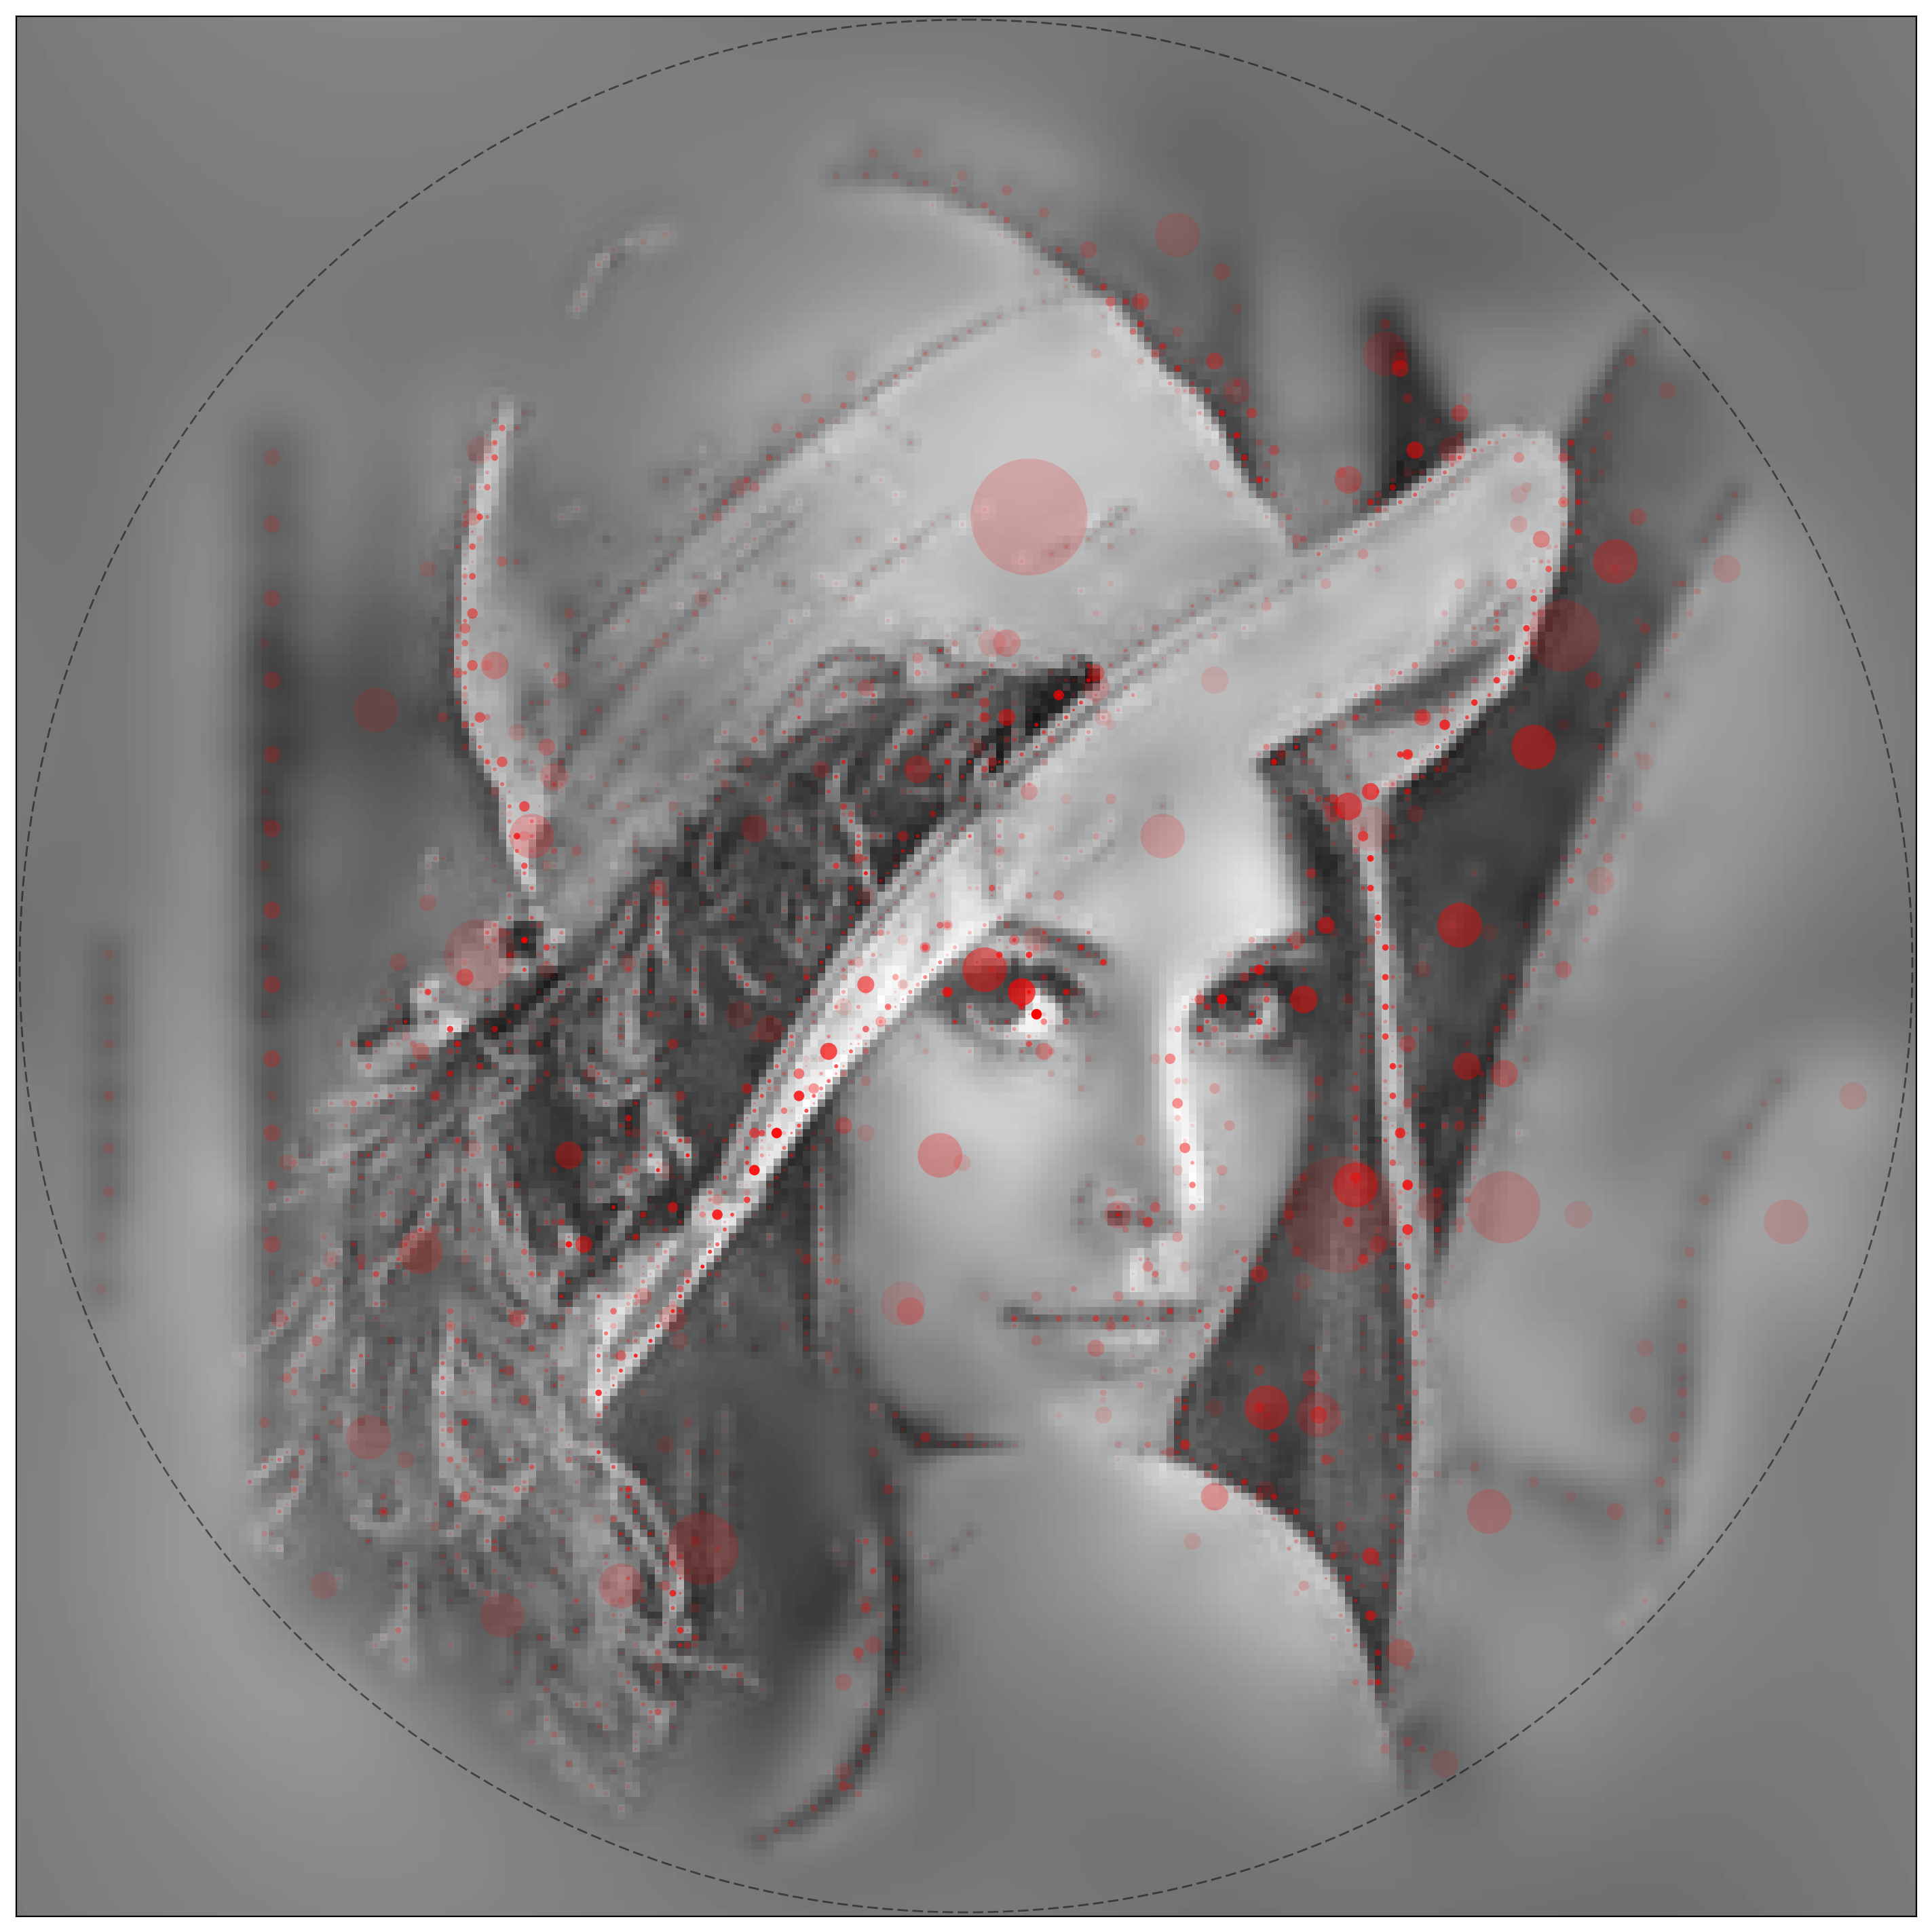

In [13]:
#mp.pe.line_width = 0
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec), show_phase=False, mask=True)
mp.savefig(fig, name)

In [14]:
#list_of_number_of_edge =  np.logspace(0, 11, i, base=2)
#list_of_number_of_edge =  4**np.arange(6)
list_of_number_of_edge =  2* 4**np.arange(6)
list_of_number_of_edge =  64* 2**np.arange(6)
print(list_of_number_of_edge)

[  64  128  256  512 1024 2048]


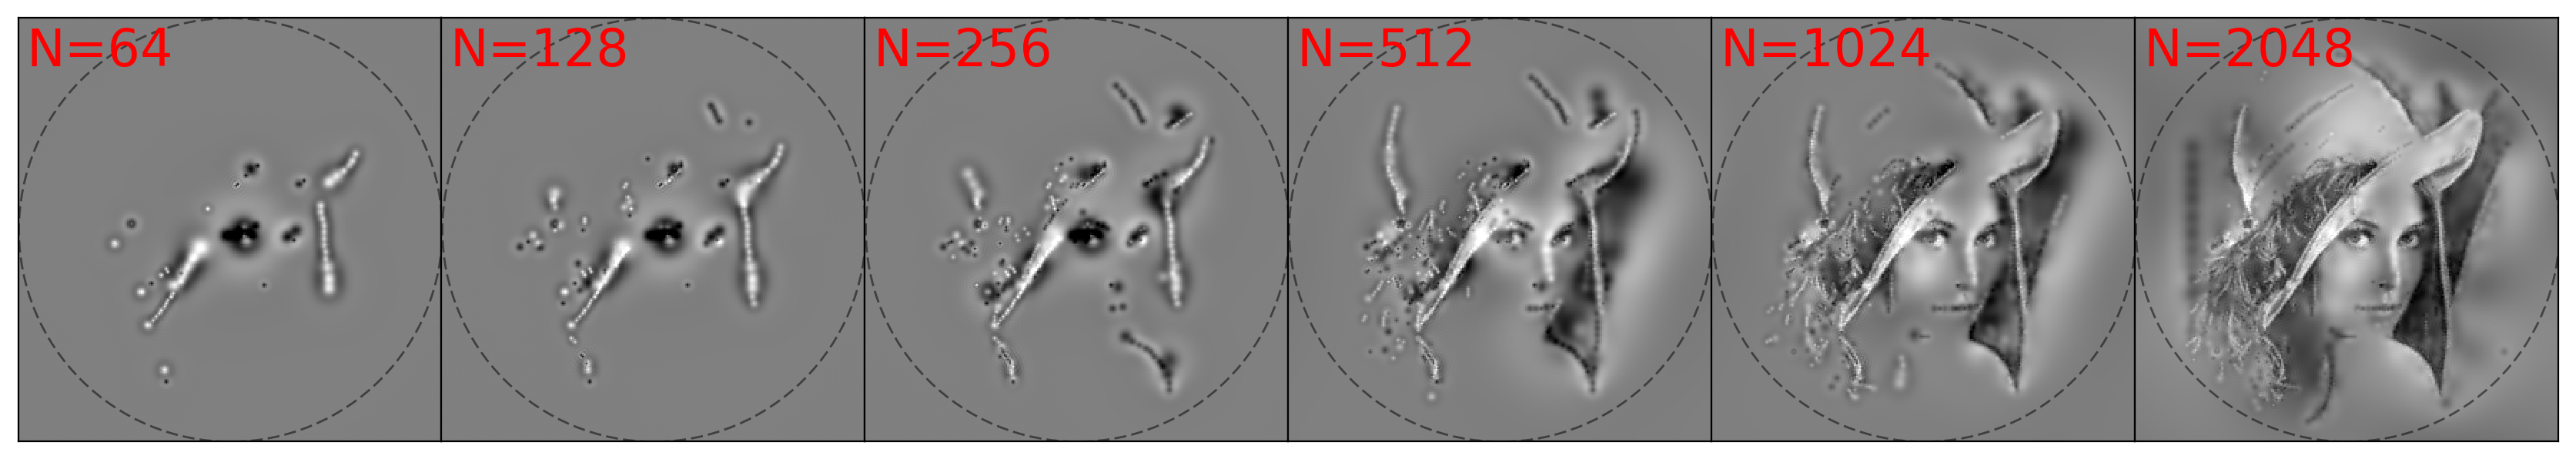

In [15]:
fig, axs = plt.subplots(1, len(list_of_number_of_edge), figsize=(3*fig_width, 3*fig_width/len(list_of_number_of_edge)))
vmax = 1.
image_rec = mp.reconstruct(edges, mask=True)        
vmax = mp.dewhitening(image_rec).max()
for i_ax, number_of_edge in enumerate(list_of_number_of_edge):
    edges_ = edges[:, :number_of_edge][..., np.newaxis]
    image_rec = mp.dewhitening(mp.reconstruct(edges_, mask=True))
    fig, axs[i_ax] = mp.imshow(image_rec/vmax, fig=fig, ax=axs[i_ax], norm=False, mask=True)
    axs[i_ax].text(5, 29, 'N=%d' % number_of_edge, color='red', fontsize=24)
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

mp.savefig(fig, name + '_movie')

## Running simulations on a set of natural images

In [16]:
%%writefile experiment_sparseness.py
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ python experiment_sparseness.py

to remove the cached files:
rm -fr **/SparseLets* **/**/SparseLets*

"""
import sys
experiment = sys.argv[1]
parameter_file = sys.argv[2]
name_database = sys.argv[3]
N_image = int(sys.argv[4])
print('N_image', N_image)
N = int(sys.argv[5])
do_linear = (sys.argv[6] == 'True')

import numpy as np
from SparseEdges import SparseEdges
mps = []
for name_database in [name_database]:
    mp = SparseEdges(parameter_file)
    mp.pe.figpath, mp.pe.formats, mp.pe.dpi = 'figures', ['png', 'pdf', 'jpg'], 450
    mp.pe.datapath = 'database/'
    mp.pe.N_image = N_image
    mp.pe.do_mask = True
    mp.pe.N = N
    mp.pe.n_theta = 1
    mp.pe.B_theta = np.inf
    mp.init()
    # normal experiment
    imageslist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)
    mps.append(mp)
    # control experiment
    if do_linear:
        mp.pe.MP_alpha = np.inf
        mp.init()
        imageslist, edgeslist, RMSE = mp.process(exp=experiment + '_linear', name_database=name_database)
        mps.append(mp)


Overwriting experiment_sparseness.py


In [17]:
if cluster:
    for cmd in [
        "frioul_list_jobs -v |grep job_array_id |uniq -c",
    ]:
        print(run_on_cluster(cmd))

In [18]:
experiment_folder = experiment = 'retina-sparseness'

cluster = True
cluster = False

do_update = True
do_update = False

do_cleanup = False
do_cleanup = True

do_run = False
do_run = True

experiments = [experiment]

def run_cmd(cmd, doit=True):
    import subprocess
    print ('⚡︎ Running ⚡︎ ', cmd)
    if doit:
        stdout = subprocess.check_output([cmd], shell=True)
        return stdout.decode()#.splitlines()

SERVER = 'perrinet.l@frioul.int.univ-amu.fr'
PATH = '/hpc/invibe/perrinet.l/science/{}/'.format(experiment_folder)

def push_to_cluster(source="{results,data_cache,experiment_sparseness.py,database}", 
                       PATH=PATH, SERVER=SERVER, 
                       opts="-av -u --exclude .AppleDouble --exclude .git"):
    fullcmd = 'ssh {} "mkdir -p {} " ; '.format(SERVER, PATH)
    fullcmd += 'rsync {} {}  {}:{} '.format(opts, source, SERVER, PATH)
    return run_cmd (fullcmd)

def run_on_cluster(cmd, PATH=PATH, SERVER=SERVER):
    import subprocess
    fullcmd = 'ssh {SERVER} "cd {PATH} ; {cmd} "'.format(SERVER=SERVER, PATH=PATH, cmd=cmd)
    return run_cmd (fullcmd)

def pull_from_cluster(source="{results,data_cache,debug.log}", dest=".", 
                       PATH=PATH, SERVER=SERVER, 
                       opts="-av -u --delete --exclude .AppleDouble --exclude .git"):
    fullcmd = 'rsync {} {}:{}{} {} '.format(opts, SERVER, PATH, source, dest)
    return run_cmd (fullcmd)

# update
if cluster and do_update:
    print(run_on_cluster("frioul_batch  'cd /hpc/invibe/perrinet.l/science/SparseEdges/; make update_dev'"))

# clean-up
if cluster and do_cleanup:
    push_to_cluster()

    for cmd in [
        #"rm -fr results data_cache ",
        "find . -name *lock* -exec rm -fr {} \\;",
        "touch frioul; rm frioul* ",
        ]:
        print(run_on_cluster(cmd))

# RUNNING
if do_run:
    if cluster:
        fullcmd = 'ipython  experiment_sparseness.py {experiment} {parameter_file} {name_database} {N_image} {N} {do_linear} '.format(
            experiment=experiment, parameter_file=parameter_file, 
            name_database=name_database, N_image=N_image, N=N, do_linear=do_linear)
        for cmd in [
            "frioul_batch  -M 136 '{}' ".format(fullcmd), 
            "frioul_list_jobs -v |grep job_array_id |uniq -c",
                    ]:
            print(run_on_cluster(cmd))
    else:
        fullcmd = 'ipython3 experiment_sparseness.py {experiment} {parameter_file} {name_database} {N_image} {N} {do_linear} '.format(
            experiment=experiment, parameter_file=parameter_file, 
            name_database=name_database, N_image=N_image, N=N, do_linear=do_linear)
        run_cmd (fullcmd)



⚡︎ Running ⚡︎  ipython3 experiment_sparseness.py retina-sparseness https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py serre07_distractors 100 2048 False 


In [19]:
import time, os
# GETTING the data
import time, os
while True:
    if cluster:
        print(pull_from_cluster())
        print(run_on_cluster("tail -n 10 {}".format(os.path.join(PATH, 'debug.log'))))
        print(run_on_cluster("frioul_list_jobs -v |grep job_array_id |uniq -c"))
    locks = run_cmd ("find . -name *lock -exec ls -l {} \;")
    print(locks)
    if len(locks) == 0: break
    time.sleep(100)

⚡︎ Running ⚡︎  find . -name *lock -exec ls -l {} \;



In [20]:
!ssh perrinet.l@frioul.int.univ-amu.fr "python -c'import numpy as np; print(np.pi)'"

3.14159265359


In [21]:
%%bash
ssh perrinet.l@frioul.int.univ-amu.fr "python -c'import numpy as np; print(np.pi)'"

3.14159265359


## Analysing results


First, we retrieve edges from a prior edge extraction

#### name_database='serre07_distractors'
imageslist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)


In [22]:
%run  experiment_sparseness.py retina-sparseness https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py serre07_distractors 100 2048 False 

N_image 100


In [23]:
imageslist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)

In [24]:
edgeslist

array([[[ 140.  ,  122.  ,  140.  , ...,  168.  ,  163.  ,   93.  ],
        [ 141.  ,  113.  ,  148.  , ...,  168.  ,  163.  ,  146.  ],
        [ 140.  ,  194.  ,  151.  , ...,  168.  ,  166.  ,   57.  ],
        ..., 
        [  94.  ,  134.  ,   55.  , ...,  187.  ,  213.  ,  203.  ],
        [ 169.  ,   87.  ,   44.  , ...,  176.  ,  144.  ,  203.  ],
        [ 170.  ,   88.  ,   44.  , ...,  101.  ,  154.  ,  203.  ]],

       [[ 103.  ,   71.  ,  196.  , ...,   85.  ,  118.  ,  151.  ],
        [ 101.  ,  139.  ,  193.  , ...,   82.  ,  118.  ,  102.  ],
        [  98.  ,  151.  ,  194.  , ...,   82.  ,  123.  ,  160.  ],
        ..., 
        [ 167.  ,  177.  ,  178.  , ...,   66.  ,   89.  ,  101.  ],
        [  81.  ,  168.  ,   96.  , ...,   69.  ,   47.  ,  101.  ],
        [  88.  ,  164.  ,   96.  , ...,  107.  ,   48.  ,  102.  ]],

       [[   1.57,    1.57,    1.57, ...,    1.57,    1.57,    1.57],
        [   1.57,    1.57,    1.57, ...,    1.57,    1.57,    1.57],
  

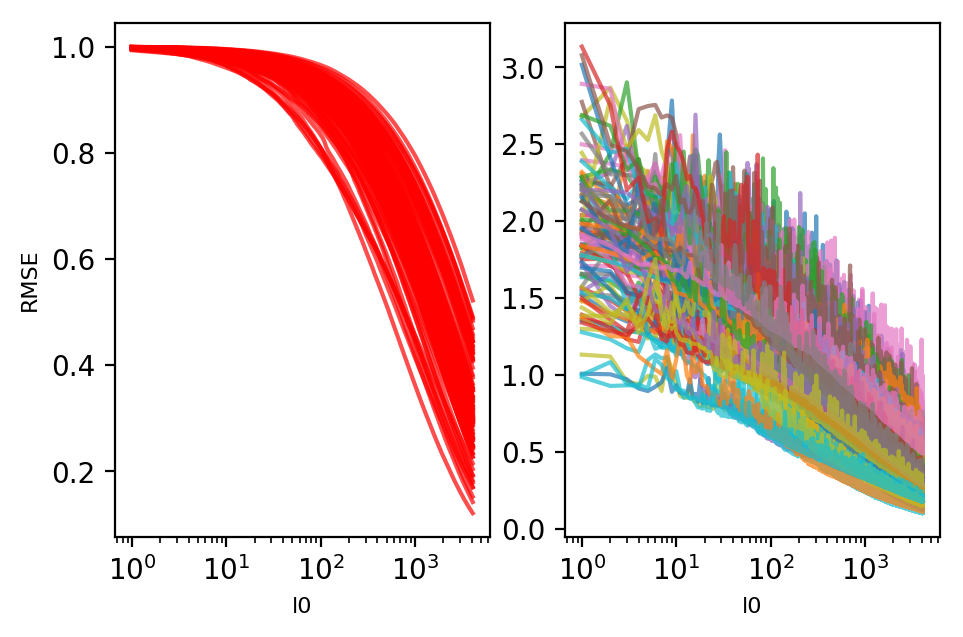

In [25]:
fig, [A, B] = plt.subplots(1, 2, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})
A.set_color_cycle(np.array([[1., 0., 0.]]))
imagelist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)
RMSE /= RMSE[:, 0][:, np.newaxis]
#print( RMSE.shape, edgeslist.shape)
value = edgeslist[4, ...]
#value /= value[0, :][np.newaxis, :]
value /= RMSE[:, 0][np.newaxis, :]

B.semilogx( value, alpha=.7)

A.semilogx( RMSE.T, alpha=.7)
A.set_xlabel('l0')
B.set_xlabel('l0')
A.axis('tight')
B.axis('tight')
_ = A.set_ylabel('RMSE')


#plt.locator_params(axis = 'x', nbins = 5)
#plt.locator_params(axis = 'y', nbins = 5)

mp.savefig(fig, experiment + '_raw')

In [26]:
imagelist, edgeslist, RMSE = mp.process(exp=experiment + '_linear', name_database=name_database)
RMSE /= RMSE[:, 0][:, np.newaxis]
print(RMSE, RMSE.shape, edgeslist.shape)

Checking dependence in serre07_distractors_retina-sparseness_linear
------------------------------------------------------------
Entropy: 0.920346740735
------------------------------------------------------------
------------------------------------------------------------
[['d', 'phi', 'theta', 'scale']] KL= 0.00000 ; 0.000
[['phi', 'theta', 'scale'], ['d']] KL= 0.05398 ; 5.865
[['theta', 'scale', 'd'], ['phi']] KL= 0.01775 ; 1.929
[['scale', 'd', 'phi'], ['theta']] KL= -0.00000 ; -0.000
[['d', 'phi', 'theta'], ['scale']] KL= 0.06835 ; 7.427
[['phi', 'theta'], ['scale', 'd']] KL= 0.01775 ; 1.929
[['theta', 'scale'], ['d', 'phi']] KL= 0.06835 ; 7.427
[['scale', 'phi'], ['d', 'theta']] KL= 0.05398 ; 5.865
[['phi', 'theta'], ['scale'], ['d']] KL= 0.07015 ; 7.622
[['theta', 'scale'], ['d'], ['phi']] KL= 0.07015 ; 7.622
[['scale', 'd'], ['phi'], ['theta']] KL= 0.01775 ; 1.929
[['d', 'phi'], ['theta'], ['scale']] KL= 0.06835 ; 7.427
[['d'], ['phi'], ['theta'], ['scale']] KL= 0.07015 ; 7.62

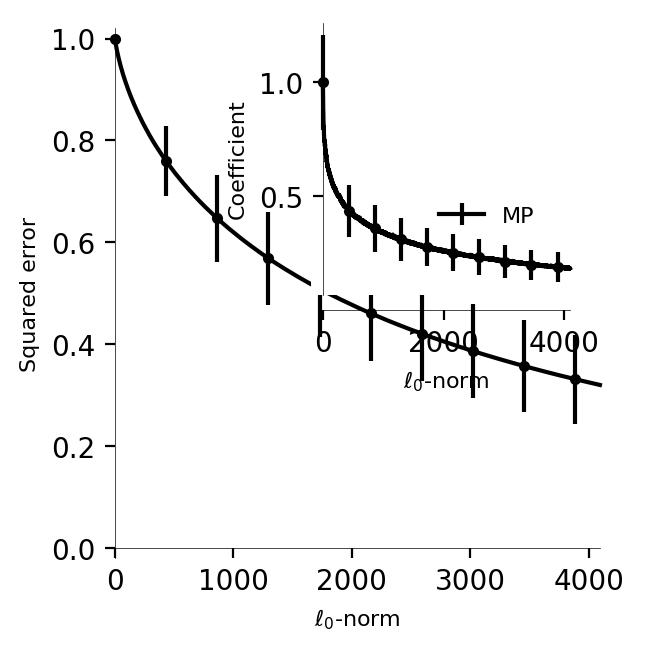

In [27]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
if do_linear:
    fig, ax, inset = mp.plot(mps=[mp, mp], experiments=[experiment, experiment + '_linear'], 
                             databases=[name_database, name_database], fig=fig, 
                             color=[0., 0., 1.], scale=False, labels=['MP', 'lin'])
else:
    fig, ax, inset = mp.plot(mps=[mp], experiments=[experiment], databases=[name_database], fig=fig, 
                  color=[0., 0., 1.], scale=False, labels=['MP'])

mp.savefig(fig, experiment + '_raw_inset')

## trying different fits

### on the modulation function
!pip install lmfit

In [28]:
imagelist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)
value = edgeslist[4, ...].T
#value /= RMSE[:, 0][np.newaxis, :]
value /= RMSE[:, 0][:, np.newaxis]
#RMSE /= RMSE[:, 0][:, np.newaxis]
N_image, N = RMSE.shape #number of images x edges
#value = value.T

(100, 4096) (100, 4096)


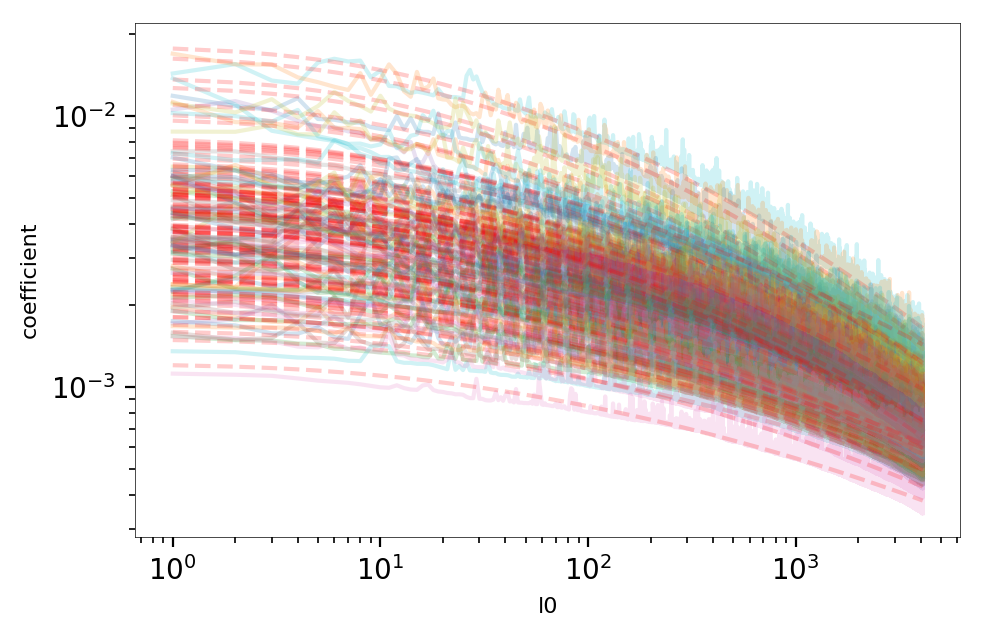

In [29]:
imagelist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)
value = edgeslist[4, ...]
value /= RMSE[:, 0][np.newaxis, :]
#RMSE /= RMSE[:, 0][:, np.newaxis]
N = RMSE.shape[1] #number of edges
value = value.T
print(value.shape, RMSE.shape)

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})
from lmfit.models import ExpressionModel
mod = ExpressionModel('amplitude * exp ( - .5 * log(x+1)**2 / rho **2 )')
verbose = False
amplitude, rho = np.zeros(N_image), np.zeros(N_image)

for i_image in range(RMSE.shape[0]):
    #pars = mod.guess(RMSE[i_image, :], x=np.arange(N))
    mod.def_vals = {'amplitude':.01, 'rho':100}
    params = mod.make_params()
    out  = mod.fit(value[i_image, :], x=np.arange(N), verbose=verbose, params=params)#, weights=np.exp(- np.arange(N) / 200))
    #print(out.params)
    #print(out.fit_report())
    amplitude[i_image] = out.params.get('amplitude').value
    rho[i_image] =  out.params.get('rho').value

    ax.loglog( value[i_image, :], alpha=.2)
    params = mod.make_params(amplitude=amplitude[i_image], rho=rho[i_image])
    ax.loglog(mod.eval(params, x=np.arange(N)), 'r--', alpha=.2)
    ax.set_xlabel('l0')
    ax.axis('tight')
    _ = ax.set_ylabel('coefficient')            


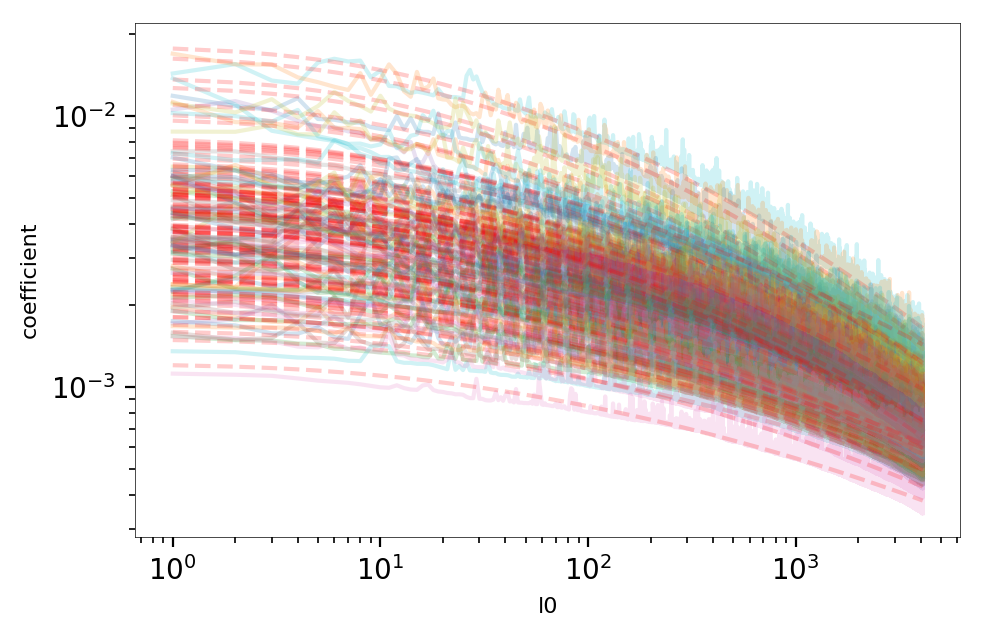

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})

for i_image in range(N_image):
    ax.loglog( value[i_image, :], alpha=.2)
    params = mod.make_params(amplitude=amplitude[i_image], rho=rho[i_image])
    ax.loglog(mod.eval(params, x=np.arange(N)), 'r--', alpha=.2)
    ax.set_xlabel('l0')
    ax.axis('tight')
    _ = ax.set_ylabel('coefficient')            
mp.savefig(fig, experiment + '_fit_all')

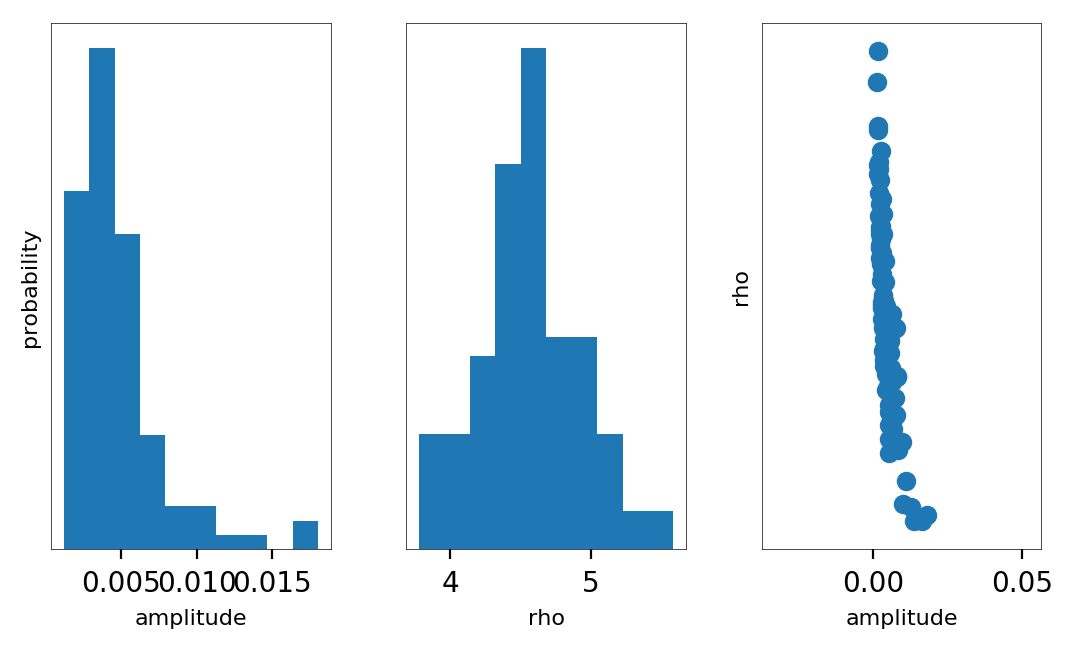

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})

axs[0].hist(amplitude)
axs[1].hist(np.abs(rho))
axs[2].scatter(amplitude, np.abs(rho))
for ax in axs: 
    ax.axis('tight')
    _ = ax.set_ylabel('')            
    _ = ax.set_yticks([])            
axs[0].set_ylabel('probability')            
axs[0].set_xlabel('amplitude')
axs[1].set_xlabel('rho')
axs[2].set_xlabel('amplitude')
axs[2].set_ylabel('rho')
fig.tight_layout()
mp.savefig(fig, experiment + '_fit_hist')

[autoreload of imageio.plugins.pillow failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: A Format named 'BMP-PIL' is already registered, use overwrite=True to replace.
]


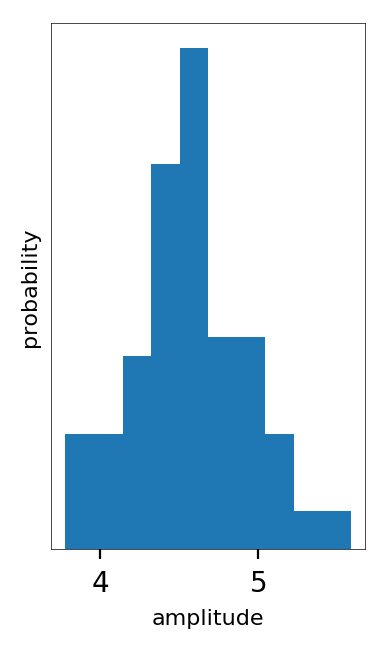

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width/2.618, fig_width/1.618), subplot_kw={'axisbg':'w'})

axs.hist(np.abs(rho))
axs.axis('tight')
_ = axs.set_ylabel('')            
_ = axs.set_yticks([])            
axs.set_ylabel('probability')            
axs.set_xlabel('amplitude')
fig.tight_layout()
mp.savefig(fig, experiment + '_fit_hist')


### on the pdf

In [34]:
value.max(axis=1).shape

(100,)

In [35]:
%pwd


'/Users/lolo/pool/science/RetinaClouds/2016-12-25_DropLets_ms'

In [36]:
#imagelist, edgeslist, RMSE = mp.process(exp=experiment + '_linear', name_database=name_database)
#imagelist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)
edgeslist = np.load('data_cache/edges/' + experiment + '_' + name_database + '_edges.npy')
value = edgeslist[4, ...].T
#value /= RMSE[:, 0][np.newaxis, :]
value /= value.min(axis=1)[:, np.newaxis]
#RMSE /= RMSE[:, 0][:, np.newaxis]
N_image, N = value.shape #number of images x edges
#value = value.T

In [37]:
N_bins, a_max = 128, value.max()
start, end = N_bins//16, N_bins
print(a_max)
v_hist = np.zeros((N_image, N_bins))
#bins = np.linspace(0, a_max, N_bins+1, endpoint=True)#[:-1]
#print(bins.shape)
for i_image in range(N_image):
    #v_hist[i_image, : ], v_bins = np.histogram(value[i_image, :], bins=bins) 
    v_hist[i_image, : ], v_bins = np.histogram(value[i_image, :], bins=N_bins) 
    v_hist[i_image, : ] /= v_hist[i_image, : ].sum()
print(v_bins.shape)
v_middle = .5*(v_bins[1:]+v_bins[:-1])

12.9868477695
(129,)


1.0 1.02124006989
1.0 1.02124006989
8 128


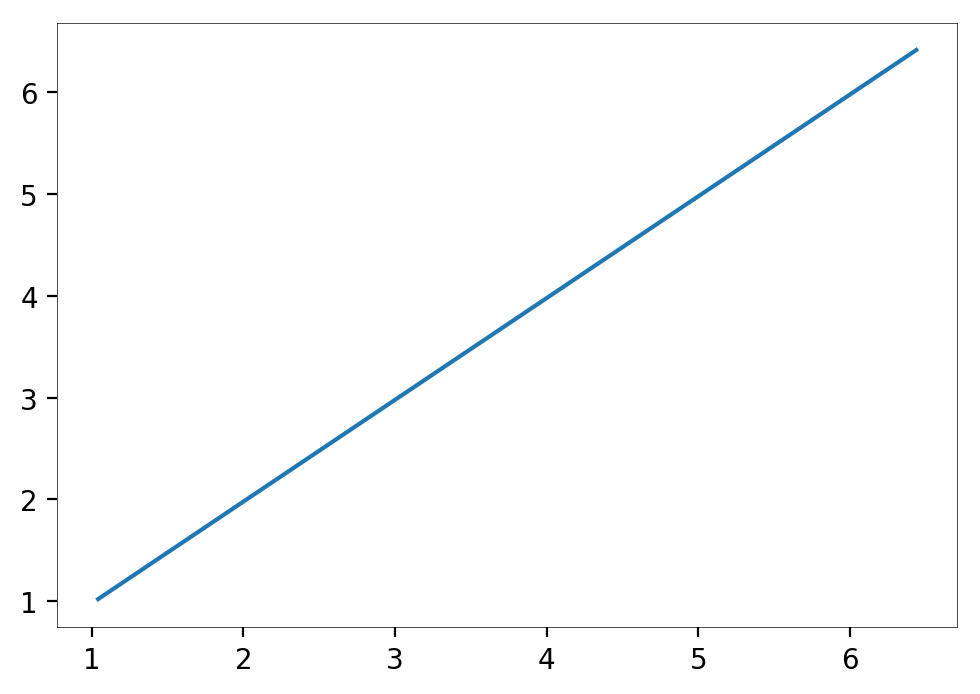

In [38]:
plt.plot(v_bins[1:], v_middle)
print(v_bins[0], v_middle[0])

print(v_bins[0], v_middle[0])

print(start, end)

MLE estimate of rho:
https://en.wikipedia.org/wiki/Power_law#Maximum_likelihood


In [39]:
amplitude, rho = np.zeros(N_image), np.zeros(N_image)
for i_image in range(N_image):
    rho[i_image] =  1 +  (end-start) / np.sum(np.log(value[i_image, start:end]))
    amplitude[i_image] = rho[i_image] - 1
print(rho)

[ 1.48  1.77  1.86  1.75  1.67  1.86  1.85  1.6   1.77  2.15  1.73  1.92
  1.73  1.63  1.72  1.77  1.71  1.73  1.71  1.52  1.86  1.84  2.01  1.9
  1.67  1.69  2.07  1.73  1.61  1.7   1.56  1.79  1.69  1.74  1.81  1.7
  1.66  1.82  1.98  1.7   1.75  1.6   1.86  1.7   1.73  1.81  1.94  1.65
  1.67  1.6   1.56  1.72  1.84  1.81  1.88  1.93  1.95  1.69  1.65  1.66
  1.69  1.53  1.67  1.72  1.75  1.83  1.72  1.73  1.53  1.61  1.63  1.52
  1.83  1.73  1.66  1.76  1.84  1.77  1.75  1.82  1.71  1.99  1.76  1.73
  1.72  1.73  1.92  1.95  1.53  1.85  1.73  1.9   1.77  1.59  1.74  1.68
  1.93  1.64  1.7   1.74]


A= 0.0576047499931 , +/-  0.01380543006
x_0= 1.19630015509 , +/-  0.178766832634
B= 0.475070357045 , +/-  0.063421389447


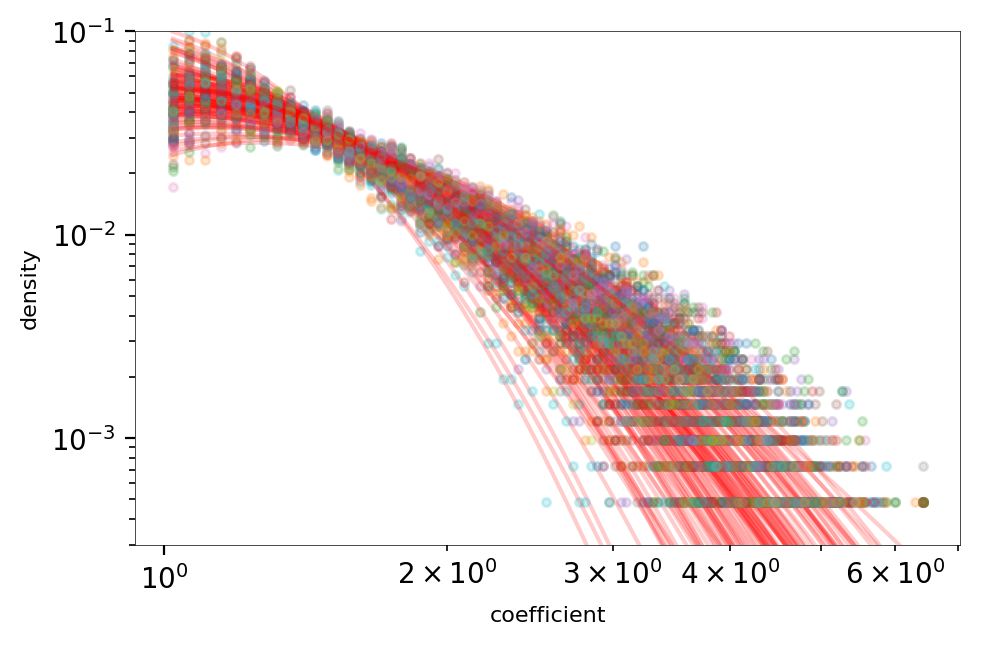

In [40]:
import lmfit
from lmfit import Model

def model(x, A, x_0, B):
    f =  A / x * np.exp( -.5 * np.log(x/x_0)**2 / B**2 )
    #f /= f.sum()
    return f

weights = np.linspace(0, 1, N_bins)
weights = np.linspace(1, 0, N_bins)
weights = np.ones(N_bins)
verbose = False

A, x_0, B = np.zeros(N_image), np.zeros(N_image), np.zeros(N_image)
for i_image in range(N_image):
    mod = Model(model)
    mod.set_param_hint('A', value=.05, min=0.)
    #mod.set_param_hint('x_0', value=.45, min=0.45, max=0.46)
    mod.set_param_hint('x_0', value=.5, min=0.)
    mod.set_param_hint('B', value=1.9, min=0.)

    valid = (v_hist[i_image, :] > 0.)
    out  = mod.fit(v_hist[i_image, valid], x=v_middle[valid], 
                   verbose=verbose, weights=weights[valid], method='leastsq', maxfev=1e6)
    if verbose: print(out.fit_report())
    A[i_image] = out.params.get('A').value
    x_0[i_image] =  out.params.get('x_0').value
    B[i_image] =  out.params.get('B').value
print ('A=', A.mean(), ', +/- ', A.std())    
print ('x_0=', x_0.mean(), ', +/- ', x_0.std())    
print ('B=', B.mean(), ', +/- ', B.std())    

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})
for i_image in range(N_image):
    ax.plot(v_middle[valid], v_hist[i_image, valid], '.', alpha=.2)
    valid = (v_hist[i_image, :] > 0.)
    #params = mod.make_params(A=A[i_image], x_0=x_0[i_image], B=B[i_image])
    #ax.plot(v_middle[valid], mod.eval(params, x=v_middle[valid]), 'r', alpha=.2)
    ax.plot(v_middle[valid], model(v_middle[valid], A=A[i_image], x_0=x_0[i_image], B=B[i_image]), 'r', alpha=.2)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.axis('tight')
    #ax.set_xlim(a_min, a_max)
    ax.set_ylim(.0003, .1)
    ax.set_ylabel('density')
    ax.set_xlabel('coefficient')            
mp.savefig(fig, experiment + '_proba')

A= 0.0662767889623 , +/-  0.0156305065431
rho= 2.24177826437 , +/-  0.406469456929


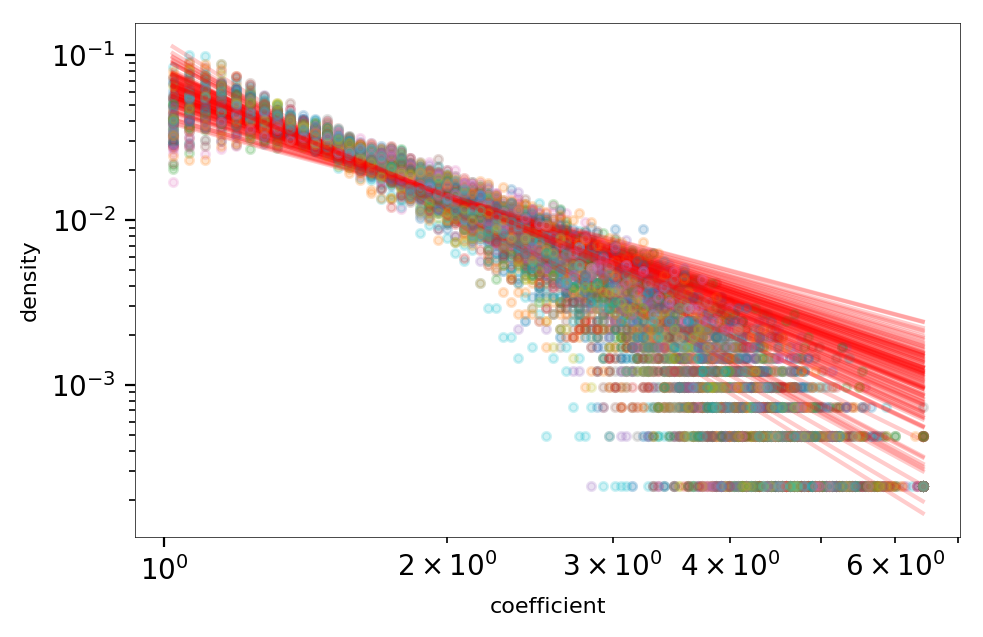

In [41]:
import lmfit
from lmfit import Model

def model(x, A, rho):
    f =  A / x ** rho
    #f /= f.sum()
    return f

weights = np.linspace(1, 0, N_bins)
weights = np.linspace(0, 1, N_bins)
weights = np.ones(N_bins)
verbose = False

A, rho = np.zeros(N_image), np.zeros(N_image)
for i_image in range(N_image):
    mod = Model(model)
    mod.set_param_hint('A', value=.05, min=0.)
    mod.set_param_hint('rho', value=2.5, min=1.)

    valid = (v_hist[i_image, :] > 0.)
    out  = mod.fit(v_hist[i_image, valid], x=v_middle[valid], 
                   verbose=verbose, weights=weights[valid], method='leastsq', maxfev=1e6)
    if verbose: print(out.fit_report())
    A[i_image] = out.params.get('A').value
    rho[i_image] =  out.params.get('rho').value
print ('A=', A.mean(), ', +/- ', A.std())    
print ('rho=', rho.mean(), ', +/- ', rho.std())    

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})
for i_image in range(N_image):
    ax.plot(v_middle[valid], v_hist[i_image, valid], '.', alpha=.2)
    valid = (v_hist[i_image, :] > 0.)
    ax.plot(v_middle[valid], model(v_middle[valid], A=A[i_image], rho=rho[i_image]), 'r', alpha=.2)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.axis('tight')
    ax.set_ylabel('density')
    ax.set_xlabel('coefficient')            
mp.savefig(fig, experiment + '_proba')

In [42]:
from lmfit.models import ExpressionModel
mod = ExpressionModel('amplitude * x**-rho ')
#mod = ExpressionModel('amplitude * exp( - log(x)**2/rho**2 ) ')
#mod = ExpressionModel('amplitude * exp( - x/rho ) ')
verbose = False
for i_image in range(N_image):
    #pars = mod.guess(RMSE[i_image, :], x=np.arange(N))
    mod.def_vals = {'amplitude': amplitude[i_image], 'rho': rho[i_image]}
    params = mod.make_params()
    out  = mod.fit(v_hist[i_image, start:end], x=v_middle[start:end], verbose=verbose)
    #print(out.fit_report())
    amplitude[i_image] = out.params.get('amplitude').value
    rho[i_image] =  out.params.get('rho').value
print(rho)    

[ 3.2   3.    2.68  2.52  2.89  2.98  2.32  3.31  3.37  2.49  2.85  2.85
  3.01  3.02  4.29  2.68  2.83  2.92  2.86  3.37  2.41  2.7   2.3   3.2
  2.88  3.86  2.31  2.93  3.27  4.77  2.51  2.85  2.83  2.38  2.46  3.28
  3.11  3.05  2.93  2.66  2.79  2.97  2.9   2.52  2.47  3.8   2.67  3.19
  3.16  2.54  2.97  3.11  2.26  2.88  2.38  2.3   2.89  3.27  2.97  2.73
  3.52  3.74  2.62  2.7   2.77  2.8   3.41  3.02  3.17  3.7   3.43  4.05
  2.82  3.29  2.96  3.03  2.76  3.47  2.96  3.6   3.56  2.13  2.9   2.72
  2.62  3.21  3.16  2.69  3.83  2.9   2.44  2.66  3.31  3.7   3.12  2.94
  2.39  3.07  3.07  3.02]


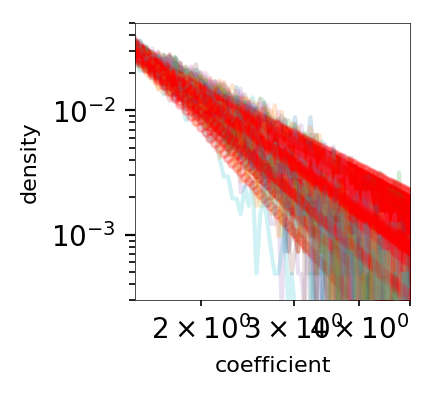

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width/3, fig_width/3), subplot_kw={'axisbg':'w'})

for i_image in range(N_image):
    ax.plot(v_middle, v_hist[i_image, :], alpha=.2)
    params = mod.make_params(amplitude=amplitude[i_image], rho=rho[i_image])
    ax.plot(v_middle[start:end], mod.eval(params, x=v_middle[start:end]), 'r.', alpha=.2)
    if True:
      ax.set_yscale('log')
      ax.set_xscale('log')
    ax.axis('tight')
    ax.set_xlim(1.5, 5)
    ax.set_ylim(.0003, .05)
    ax.set_ylabel('density')
    ax.set_xlabel('coefficient')            
mp.savefig(fig, experiment + '_proba')

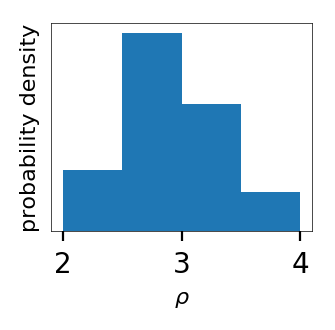

In [44]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width/3, fig_width/3), subplot_kw={'axisbg':'w'})

axs.hist(np.abs(rho), bins=np.linspace(2, 4, 5))
axs.axis('tight')
_ = axs.set_ylabel('')            
_ = axs.set_yticks([])            
axs.set_ylabel('probability density')            
axs.set_xlabel(r'$\rho$')
fig.tight_layout()
mp.savefig(fig, experiment + '_fit_hist')

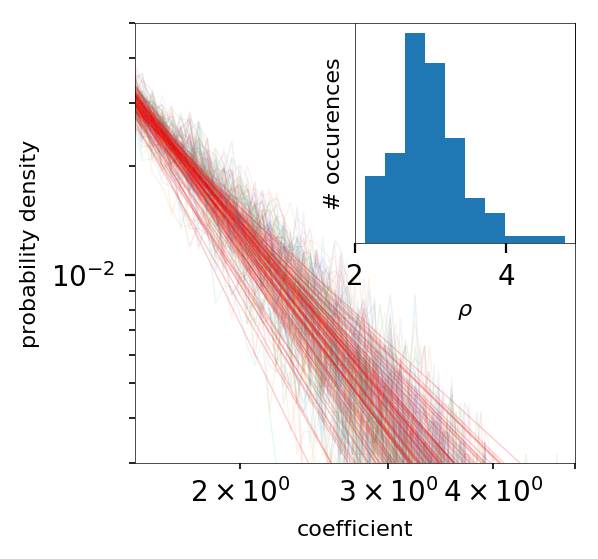

In [45]:
#fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/2), subplot_kw={'axisbg':'w'})
fig = plt.figure(figsize=(fig_width/2, fig_width/2))

ax = fig.add_axes([0.18, 0.15, .8, .8], axisbg='w')

for i_image in range(N_image):
    ax.plot(v_middle, v_hist[i_image, :], '-', alpha=.1, lw=.5)
    params = mod.make_params(amplitude=amplitude[i_image], rho=rho[i_image])
    ax.plot(v_middle[start:end], mod.eval(params, x=v_middle[start:end]), 'r', alpha=.2, lw=.5)
    if True:
      ax.set_yscale('log')
      ax.set_xscale('log')
    ax.axis('tight')
    ax.set_xlim(1.5, 5.)
    ax.set_ylim(.003, .05)
    ax.set_ylabel('probability density')
    ax.set_xlabel('coefficient')  

inset = fig.add_axes([0.58, 0.55, .4, .4], axisbg='w')

inset.hist(np.abs(rho))
inset.axis('tight')
_ = inset.set_ylabel('')            
_ = inset.set_yticks([])            
inset.set_ylabel('# occurences')            
inset.set_xlabel(r'$\rho$')

#fig.subplots_adjust(left=0.22, bottom=0.1, right=.9, top=.9)

mp.savefig(fig, experiment + '_proba_inset')

#TODO : do the same for experiment + '_linear'

In [46]:

rho_0 = rho.mean()
print(rho_0)
v_hist_scale = np.zeros((N_image, N_bins))
for i_image in range(N_image):
    #v_hist[i_image, : ], v_bins = np.histogram(value[i_image, :], bins=bins) 
    v_hist_scale[i_image, : ], v_bins = np.histogram(value[i_image, :]**((rho_0-1)/(rho[i_image]-1)), bins=N_bins) 
    v_hist_scale[i_image, : ] /= v_hist_scale[i_image, : ].sum()
    


2.98177377922


In [47]:
amplitude_scale, rho_scale = np.zeros(N_image), np.zeros(N_image)
for i_image in range(N_image):
    mod.def_vals = {'amplitude': amplitude[i_image], 'rho': rho[i_image]}
    params = mod.make_params()
    out  = mod.fit(v_hist_scale[i_image, start:end], x=v_middle[start:end], verbose=verbose)
    amplitude_scale[i_image] = out.params.get('amplitude').value
    rho_scale[i_image] =  out.params.get('rho').value
print(rho_scale)    

[ 3.    2.99  3.02  2.99  2.97  2.99  2.96  3.03  3.2   2.91  2.97  2.95
  2.97  2.99  3.08  2.99  3.03  2.95  3.07  3.26  2.99  3.    2.92  3.09
  2.92  3.35  2.89  2.96  3.05  3.09  2.95  2.96  2.95  3.    3.    3.01
  2.94  2.98  3.    2.95  2.97  2.99  2.97  2.91  2.94  2.94  2.89  2.92
  3.05  2.88  2.99  3.03  2.92  2.91  2.93  2.9   2.98  3.03  2.96  2.89
  3.03  3.15  2.92  2.89  2.89  3.    3.06  2.98  2.95  2.97  3.07  3.15
  2.94  3.03  2.96  2.96  2.97  2.98  2.97  3.13  3.02  2.93  3.01  3.03
  2.95  3.05  3.01  2.86  2.96  3.01  2.86  2.88  3.02  3.16  2.96  3.01
  2.95  3.    3.05  3.02]


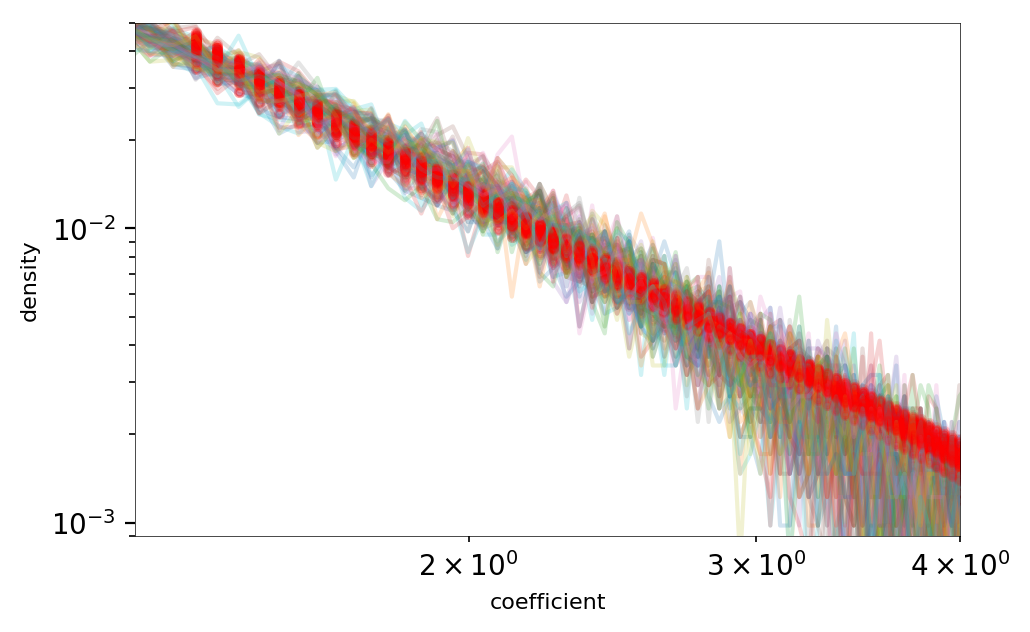

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})

for i_image in range(N_image):
    ax.plot(v_middle, v_hist_scale[i_image, :], alpha=.2)
    params = mod.make_params(amplitude=amplitude_scale[i_image], rho=rho_scale[i_image])
    ax.plot(v_middle[start:end], mod.eval(params, x=v_middle[start:end]), 'r.', alpha=.2)
    if True:
      ax.set_yscale('log')
      ax.set_xscale('log')
    ax.set_xlim(1.25, 4)
    ax.set_ylim(.0009, .05)
    ax.set_ylabel('density')
    ax.set_xlabel('coefficient')            
mp.savefig(fig,  experiment + '_proba_scaled')

(array([ 10.,  26.,  34.,  17.,   6.,   2.,   2.,   1.,   1.,   1.]),
 array([ 2.86,  2.91,  2.96,  3.01,  3.06,  3.11,  3.15,  3.2 ,  3.25,
         3.3 ,  3.35]),
 <a list of 10 Patch objects>)

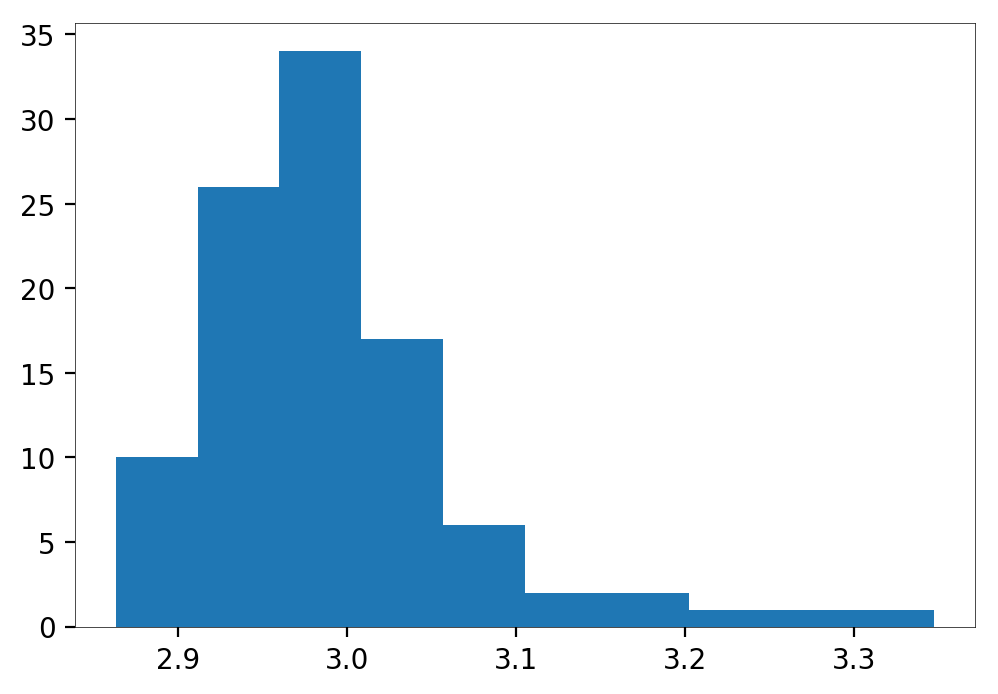

In [49]:
plt.hist(rho_scale)

## DropLets

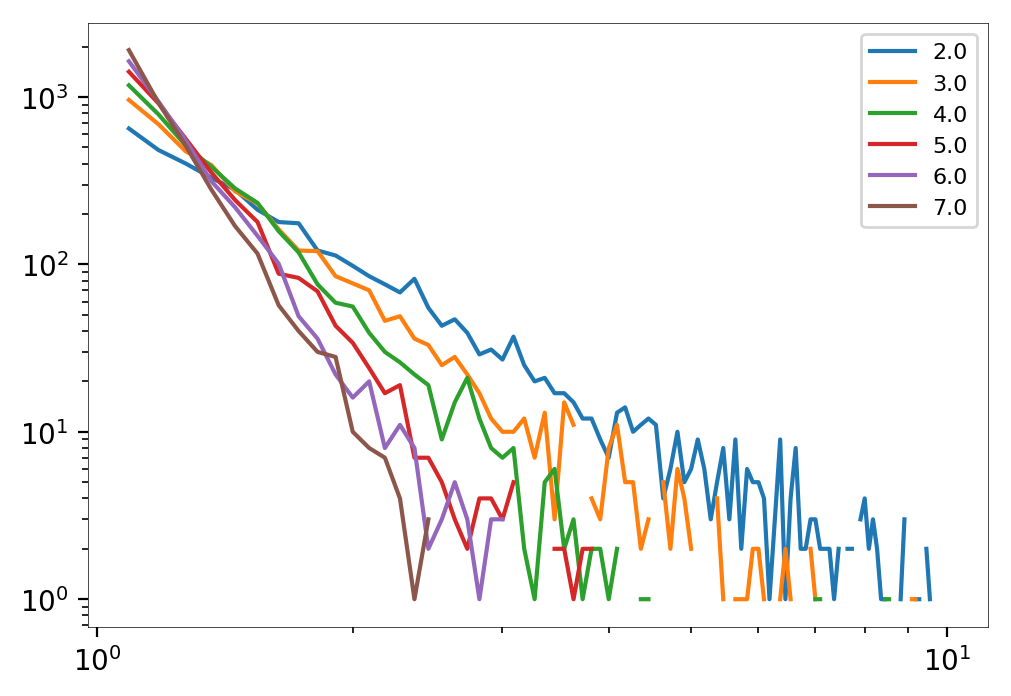

In [50]:
from scipy.stats import powerlaw
N_sparse = 6
sparseness =  np.linspace(2, 7, N_sparse, endpoint=True)
N_edge = N

fig , ax = plt.subplots()
bins= np.linspace(1, 10, 100)
for a in sparseness:
    #s =  np.random.power(a=a, size=N_edge)
    s = 1/powerlaw.rvs(a=a, size = N_edge)
    hist, bins_ = np.histogram(s, bins=bins)
    ax.loglog(bins[1:], hist, label=a)
ax.legend()
    

In [51]:
frames =[]
for a in sparseness:
    frames.append(mp.texture( N_edge=N_edge, a=a, randn=False))

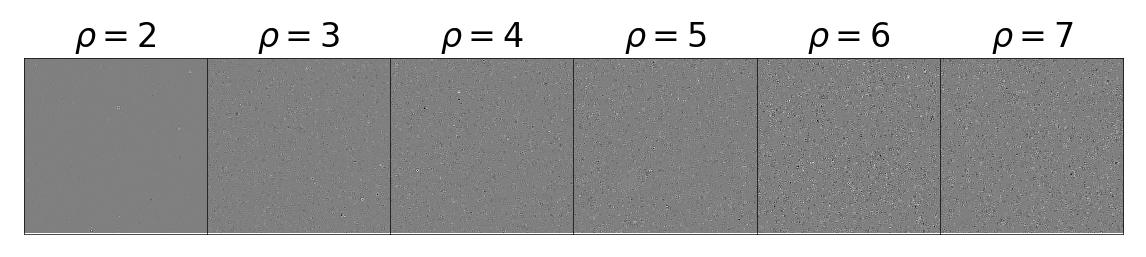

In [52]:
fig, axs = plt.subplots(1, N_sparse, sharex=True, sharey=True)
fig.set_size_inches(fig_width, 1.2*fig_width/N_sparse)
for i_sparse in range( N_sparse):
    vmax=np.abs(frames[i_sparse]).max()
    vmin=-vmax
    axs[i_sparse].imshow(frames[i_sparse], origin='lower', cmap='gray', vmin=vmin, vmax=vmax, interpolation='none')
    axs[i_sparse].axis('tight')
    axs[i_sparse].set_xticks([])
    axs[i_sparse].set_yticks([])
    axs[i_sparse].set_title(label = r'$\rho=%.0f$' % sparseness[i_sparse])

fig.tight_layout()
fig.subplots_adjust(left=0, bottom=0, right=1, top=.8, wspace=0, hspace=0)   

mp.savefig(fig, 'droplets')

[5.00000000e-06 1.05737126e-04 2.23606798e-03 4.72870805e-02
 1.00000000e+00]


/var/folders/3p/m0g52j9j69z3gj8ktpgg1dm00000gn/T/ipykernel_67799/2693606862.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chance = np.array(chance, dtype=np.float)


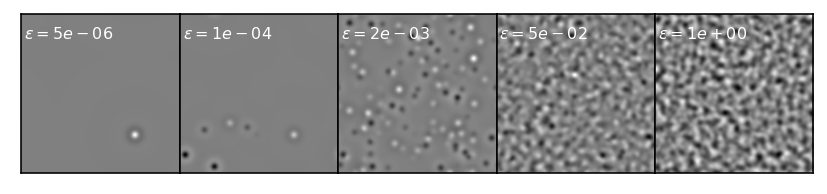

In [5]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt

# PARAMETERS
seed = 2042
np.random.seed(seed=seed)
N_sparse = 5
sparse_base = 2.e5
sparseness =  np.logspace(-1, 0, N_sparse, base=sparse_base, endpoint=True)
print(sparseness)

# TEXTON
N_X, N_Y, N_frame = 256, 256, 1
fx, fy, ft = mc.get_grids(N_X, N_Y, 1)
mc_i = mc.envelope_gabor(fx, fy, ft, sf_0=0.05, B_sf=0.025, B_theta=np.inf)
#print(ft.shape)
#print(mc_i.shape)
#fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width))
#axs.imshow(mc.envelope_speed(fx, fy, ft)[:, :, 0], vmin=-1, vmax=1, cmap=plt.gray())

#texton = 2*mc.rectif(mc.random_cloud(mc_i, impulse=True))-1
#fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width))
#axs.imshow(texton[:, :, 0], vmin=-1, vmax=1, cmap=plt.gray())

values = np.random.randn(N_X, N_Y, N_frame)
#a = 2.
#values = np.random.pareto(a=a, size=(N_X, N_Y, N_frame)) + 1
#values *= np.sign(np.random.randn(N_X, N_Y, N_frame))

#chance = np.random.rand(N_X, N_Y, N_frame)
chance = np.argsort(-np.abs(values.ravel()))
#fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width))
#axs.plot(np.abs(values.ravel())[chance])
chance = np.array(chance, dtype=np.float)
chance /= chance.max()
chance = chance.reshape((N_X, N_Y, N_frame))
#print(chance.min(), chance.max())
#fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width))
#axs.imshow(chance[:, :, 0], vmin=0, vmax=1, cmap=plt.gray())

fig, axs = plt.subplots(1, N_sparse, figsize=(fig_width, fig_width/N_sparse))
for i_ax, l0_norm in enumerate(sparseness):

    threshold = 1 - l0_norm
    mask = np.zeros_like(chance)
    mask[chance > threshold] = 1.
    
    im = 2*mc.rectif(mc.random_cloud(mc_i, events=mask*values))-1
                
    axs[i_ax].imshow(im[:, :, 0], vmin=-1, vmax=1, cmap=plt.gray())
    #axs[i_ax].text(9, 80, r'$n=%.0f\%%$' % (noise*100), color='white', fontsize=10)
    axs[i_ax].text(4, 40, r'$\epsilon=%.0e$' % l0_norm, color='white', fontsize=8)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)
# plt.savefig(fig, experiment + '_droplets')

## modeling different sparseness exponents in a natural image

In [ ]:
!ls data_cache/retina-lena.npy

In [ ]:
print(mp.pe.matpath)

In [ ]:
name = experiment.replace('sparseness', 'lena')
matname = os.path.join(mp.pe.matpath, name + '.npy')
N_rho = 3
fig, axs = plt.subplots(1, N_rho, figsize=(fig_width, fig_width/N_rho))
vmax = 1.
for i_ax, rho in enumerate(np.logspace(-1, 1, N_rho, base=2)):
    edges = np.load(matname)
    edges[4, :] = edges[4, :] ** rho
    image_rec = mp.dewhitening(mp.reconstruct(edges, mask=True))      
    fig, axs[i_ax] = mp.imshow(image_rec/vmax, fig=fig, ax=axs[i_ax], norm=False, mask=True)
    axs[i_ax].text(5, 29, r'$\rho=%.1f$' % rho, color='red', fontsize=16)
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

mp.savefig(fig, name + '_rescale')

## some book keeping for the notebook

In [12]:
%reload_ext watermark

In [10]:
%watermark -i -h -m -v -p MotionClouds,numpy,SLIP,LogGabor,SparseEdges,matplotlib,scipy,pillow,imageio 

Python implementation: CPython
Python version       : 3.9.8
IPython version      : 7.28.0

MotionClouds: 20200212
numpy       : 1.21.4
SLIP        : not installed
LogGabor    : not installed
SparseEdges : not installed
matplotlib  : 3.4.3
scipy       : 1.6.0
pillow      : not installed
imageio     : 2.9.0

Compiler    : Clang 13.0.0 (clang-1300.0.29.3)
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: ekla

